밑바닥부터 시작하는 딥러닝 2
# 1.2 신경망의 추론

## 신경망 추론 전체 그림

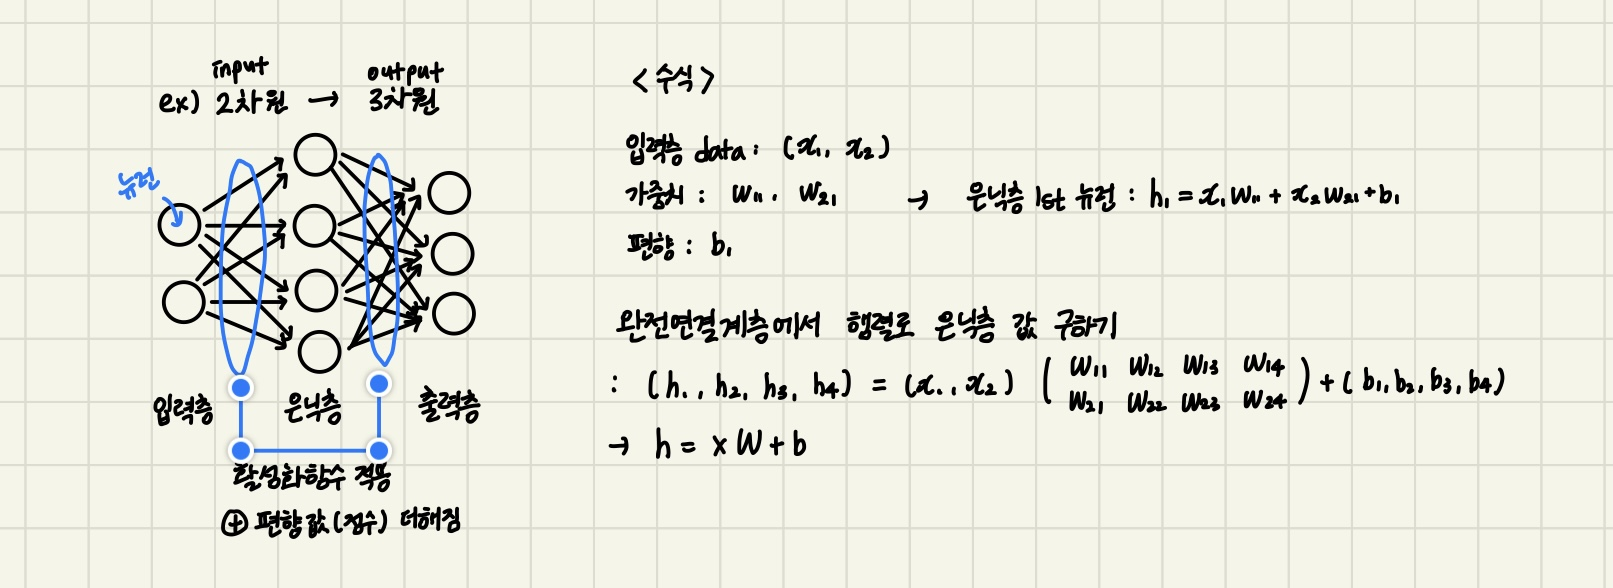

* Input 값과 W, b 를 곱.합 연산을 통해 h = xW +b를 계산하고 마지막에 활성화 함수를 거쳐 h(a) 출력

In [1]:
import numpy as np
W1 = np.random.randn(2, 4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10, 2) # 입력
h = np.matmul(x, W1) + b1
print(x.shape)
print(W1.shape)
print(b1.shape)
print("-" * 50)
print(h)

(10, 2)
(2, 4)
(4,)
--------------------------------------------------
[[-1.8233224   0.6445063  -0.73750745 -1.00580737]
 [-4.25935005  2.65458396  0.5935449  -1.41197462]
 [-0.71065333 -0.27647945  2.61495257 -0.95657153]
 [ 0.85088281 -1.56220271 -2.06055228 -0.56468181]
 [-1.75879513  0.59134582 -0.88850575 -0.99106574]
 [-2.77608958  1.43107936 -0.77041686 -1.14561873]
 [ 0.62341549 -1.37382306 -2.88231017 -0.57005354]
 [ 0.43284979 -1.21669643 -2.6156749  -0.60741938]
 [-1.07573799  0.02850856 -2.34348107 -0.83995284]
 [-0.15258907 -0.73575911  0.64867277 -0.80635432]]


* np.random.randn(m, n) : 0~1 의 균일분포 표준정규분포 난수를 matrix array(m, n) 생성
* 10개의 샘플 데이터 각각을 완전연결계층으로 변환

-> 완전연결계층에 의한 변환은 선형 변환 -> 비선형 효과를 부여해 표현력을 높이는 것이 활성화 함수 (없으면 뉴런의 단순 곱셈의 합이 되어버림)

Step Function, Sigmoid Function, Tanh Function, ReLU Function, Softmax Function 등과 같은 다양한 활성화 함수 존재

In [2]:
import matplotlib.pyplot as plt

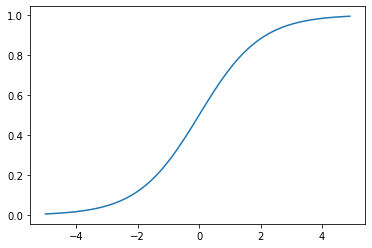

In [3]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

* 0과 1 중간 상태 나타낼 수 있음
* 미분 가능
* 이진분류에 주로 사용
* 미분 값 중 최댓값이 1/4로 gradient vanishing 문제 발생
* 함수의 중심이 0이 아니기 때문에 학습이 느려질 수 있음

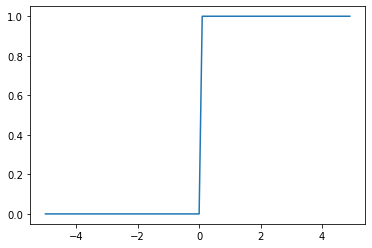

In [4]:
# Step Function
def step(x):
    return np.array(x>0)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

plt.plot(x, y)
plt.show()

* 0과 1 의 중간 상태를 나타낼 수 없음
* 미분이 필요한 back propogation 과정에서는 사용 불가능

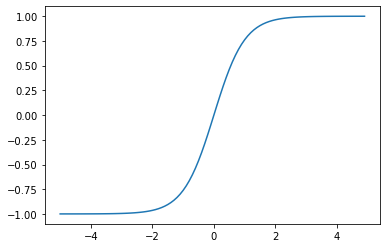

In [5]:
# Tanh Function
def tanh(x):
    return np.tanh(x)

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)

plt.plot(x, y)
plt.show()

* Sigmoid function을 보완한 함수 - 함수의 중심을 0으로 옮김

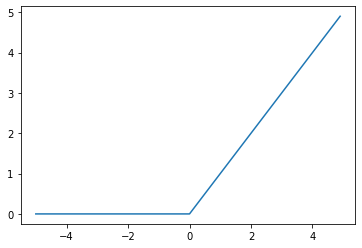

In [6]:
# ReLU Function
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.show()

* Gradient vanishing 문제 해결
* 깊은 신경망에서 잘 작동
* 입력값이 음수이면 기울기도 0이 되므로 뉴런이 죽을 수 있음- 다시 회생 어려움

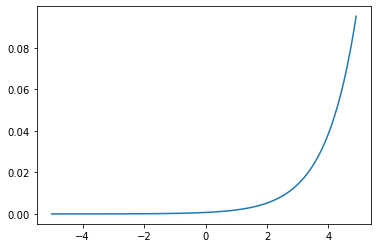

In [7]:
# Sofmax Function
def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x))

x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)

plt.plot(x, y)
plt.show()

* Multi분류에서 주로 사용

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2) # 입력 (2차원 데이터 10개가 미니배치로 처리)

W1 = np.random.randn(2, 4) # 가중치
b1 = np.random.randn(4) # 편향

W2 = np.random.randn(4, 3) # 가중치
b2 = np.random.randn(3) # 편향

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

print(h.shape)
print(s.shape) # 10개의 데이터가 한꺼번에 처리되었고, 각 데이터는 3차원 데이터로 변환됨
print(s)

(10, 4)
(10, 3)
[[2.23346105 2.46584064 0.61011544]
 [2.59848116 2.08783427 0.86285265]
 [2.36719346 2.89972157 0.809868  ]
 [2.59957642 2.77439259 1.02108138]
 [2.33558288 2.939681   0.88694822]
 [2.3547775  2.85164654 0.86361778]
 [2.36466555 2.84823009 0.76957452]
 [2.34044074 2.93526072 0.86103684]
 [2.29966697 3.26079177 1.19231635]
 [3.00811618 2.80781998 1.35727363]]


* 출력된 3차원 벡터의 각 차원은 각 클래스가 대응하는 점수(score)
* 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과!
* 점수에 소프트맥스 함수를 입력하면 확률

In [9]:
def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x))

p = softmax(s)

print(p)

[[0.02974383 0.03752477 0.0058666 ]
 [0.04284726 0.02571295 0.00755352]
 [0.03399978 0.05790954 0.00716371]
 [0.04289422 0.05108818 0.00884845]
 [0.03294184 0.06027043 0.00773773]
 [0.03358025 0.0551914  0.0075593 ]
 [0.03391394 0.05500316 0.0068808 ]
 [0.03310225 0.0600046  0.00753981]
 [0.03177969 0.08309232 0.01050107]
 [0.06453946 0.05282479 0.01238436]]


* 모두 첫 번째 클래스로 예측